In [32]:
import numpy as np
import pandas as pd

In [33]:
df = pd.read_csv('books/books.csv')
df.shape

(6810, 12)

In [34]:
df.isna().sum()

isbn13               0
isbn10               0
title                0
subtitle          4429
authors             72
categories          99
thumbnail          329
description        262
published_year       6
average_rating      43
num_pages           43
ratings_count       43
dtype: int64

In [35]:
df['description'].fillna('no description', inplace=True)

/var/folders/rt/q1nqm7vd4j175p7gyf5tqnhh0000gn/T/ipykernel_2115/4977182.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['description'].fillna('no description', inplace=True)


In [36]:
df.isna().sum()

isbn13               0
isbn10               0
title                0
subtitle          4429
authors             72
categories          99
thumbnail          329
description          0
published_year       6
average_rating      43
num_pages           43
ratings_count       43
dtype: int64

In [37]:
df.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [38]:
features = ['subtitle', 'authors', 'categories', 'thumbnail', 'published_year', 'average_rating', 'num_pages', 'ratings_count']
for col in features:
    df[col].fillna('unknown', inplace=True)

/var/folders/rt/q1nqm7vd4j175p7gyf5tqnhh0000gn/T/ipykernel_2115/1911354765.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('unknown', inplace=True)
/var/folders/rt/q1nqm7vd4j175p7gyf5tqnhh0000gn/T/ipykernel_2115/1911354765.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df[col].fillna('unknown', inplace=True)


In [39]:
df.isna().sum()

isbn13            0
isbn10            0
title             0
subtitle          0
authors           0
categories        0
thumbnail         0
description       0
published_year    0
average_rating    0
num_pages         0
ratings_count     0
dtype: int64

In [40]:
df.isna().sum()

isbn13            0
isbn10            0
title             0
subtitle          0
authors           0
categories        0
thumbnail         0
description       0
published_year    0
average_rating    0
num_pages         0
ratings_count     0
dtype: int64

In [41]:
df['description_length'] = df['description'].apply(len)

<Axes: xlabel='description_length', ylabel='Count'>

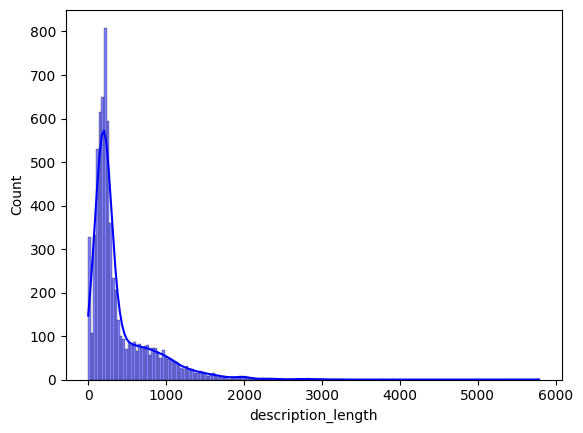

In [47]:
import seaborn as sns
sns.histplot(
    data = df,
    x = 'description_length',
    kde=True,
    color='blue'
)

In [49]:
df.loc[df['description_length']>2000, 'description'].count()

53

In [50]:
from sentence_transformers import SentenceTransformer
import pandas as pd

In [51]:
model = SentenceTransformer('all-MiniLM-L6-v2')
df['vectors'] = df['description'].apply(lambda desc: model.encode(desc).tolist())

In [77]:
from qdrant_client import models, QdrantClient
from qdrant_client.http.models import CollectionDescription, VectorParams

In [53]:
client = QdrantClient(host='localhost', port=6333)

In [55]:
client.recreate_collection(
    collection_name='books',
    vectors_config=VectorParams(size=384, distance='Cosine')
)

True

In [56]:
df.columns

Index(['isbn13', 'isbn10', 'title', 'subtitle', 'authors', 'categories',
       'thumbnail', 'description', 'published_year', 'average_rating',
       'num_pages', 'ratings_count', 'description_length', 'vectors'],
      dtype='object')

In [80]:
points=[]
for idx, row in df.iterrows():
    point = models.PointStruct(
        id = idx,
        vector = row['vectors'],
        payload = {
            "isbn13": row['isbn13'],
            "isbn10": row['isbn10'],
            "title": row['title'],
            "subtitle": row['subtitle'],
            "authors": row['authors'],
            "categories": row['categories'],
            "thumbnail": row['thumbnail'],
            "description": row['description'],
            "published_year": row['published_year'],
            "average_rating": row['average_rating'],
            "num_pages": row['num_pages'],
            "ratings_count": row['ratings_count'],
            "description_length": row['description_length']
        }
    )
    points.append(point)

In [81]:
client.upload_points(collection_name="books", points=points)

In [84]:
input_text = "fantasy fiction with a dark theme"

In [103]:
results = []

In [104]:
hits = client.search(
    collection_name='books',
    query_vector=model.encode(input_text).tolist(),
    limit = 3
)
for idx, hit in enumerate(hits):
    result = {}
    result['index'] = idx+1
    result['title'] = hit.payload['title']
    result['authors'] = hit.payload['authors']
    result['description'] = hit.payload['description']
    print(hit.payload['average_rating'])
    result['average_rating'] = hit.payload['average_rating']
    result['published_year'] = hit.payload['published_year']
    result['thumbnail'] = hit.payload['thumbnail']
    results.append(result)

3.99
4.01
3.87


In [105]:
results[0]

{'index': 1,
 'title': 'The Changeling',
 'authors': 'Philippa Carr',
 'description': 'FICTION-ROMANCE/GOTHIC',
 'average_rating': 3.99,
 'published_year': 1990.0,
 'thumbnail': 'http://books.google.com/books/content?id=5jE316OI8qgC&printsec=frontcover&img=1&zoom=1&source=gbs_api'}